In [1]:
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

Using TensorFlow backend.


In [ ]:
# Load dataset
def load_data():
    (x_train, y_train), (_, _) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5

    # Convert shape from (60000, 28, 28) to (60000, 784)
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train)

X_train, y_train = load_data()
print(X_train.shape, y_train.shape)


11493376/11490434 [==============================] - 1s 0us/step
(60000, 784) (60000,)


In [ ]:
def build_generator():
    model = Sequential()
    
    model.add(Dense(units=256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(units=512))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(units=1024))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(units=784, activation='tanh'))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return model

generator = build_generator()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [ ]:
def build_discriminator():
    model = Sequential()
    
    model.add(Dense(units=1024 ,input_dim=784))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
       
    model.add(Dense(units=512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
       
    model.add(Dense(units=256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
      
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return model
  
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [ ]:
def build_GAN(discriminator, generator):
    discriminator.trainable = False
    GAN_input = Input(shape=(100,))
    x = generator(GAN_input)
    GAN_output = discriminator(x)
    GAN = Model(inputs=GAN_input, outputs=GAN_output)
    GAN.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return GAN

GAN = build_GAN(discriminator, generator)
GAN.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [ ]:
def draw_images(generator, epoch, examples=25, dim=(5,5), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(25,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='Greys')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('Generated_images %d.png' %epoch)

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


  7%|▋         | 9/128 [00:00<00:01, 83.17it/s]

Epoch 2


  7%|▋         | 9/128 [00:00<00:01, 85.57it/s]

Epoch 3


  7%|▋         | 9/128 [00:00<00:01, 87.73it/s]

Epoch 4


  7%|▋         | 9/128 [00:00<00:01, 85.59it/s]

Epoch 5


  7%|▋         | 9/128 [00:00<00:01, 86.58it/s]

Epoch 6


  7%|▋         | 9/128 [00:00<00:01, 89.28it/s]

Epoch 7


  7%|▋         | 9/128 [00:00<00:01, 80.54it/s]

Epoch 8


  7%|▋         | 9/128 [00:00<00:01, 80.79it/s]

Epoch 9


  7%|▋         | 9/128 [00:00<00:01, 83.33it/s]

Epoch 10


  7%|▋         | 9/128 [00:00<00:01, 83.19it/s]

Epoch 11


  7%|▋         | 9/128 [00:00<00:01, 85.84it/s]

Epoch 12


  7%|▋         | 9/128 [00:00<00:01, 85.46it/s]

Epoch 13


  7%|▋         | 9/128 [00:00<00:01, 85.00it/s]

Epoch 14


  7%|▋         | 9/128 [00:00<00:01, 84.59it/s]

Epoch 15


  7%|▋         | 9/128 [00:00<00:01, 81.44it/s]

Epoch 16


  7%|▋         | 9/128 [00:00<00:01, 86.39it/s]

Epoch 17


  7%|▋         | 9/128 [00:00<00:01, 83.31it/s]

Epoch 18


  7%|▋         | 9/128 [00:00<00:01, 82.68it/s]

Epoch 19


  7%|▋         | 9/128 [00:00<00:01, 82.33it/s]

Epoch 20


  6%|▋         | 8/128 [00:00<00:01, 75.66it/s]

Epoch 21


  6%|▋         | 8/128 [00:00<00:01, 79.23it/s]

Epoch 22


  7%|▋         | 9/128 [00:00<00:01, 83.44it/s]

Epoch 23


  7%|▋         | 9/128 [00:00<00:01, 84.29it/s]

Epoch 24


  7%|▋         | 9/128 [00:00<00:01, 85.04it/s]

Epoch 25


  7%|▋         | 9/128 [00:00<00:01, 85.60it/s]

Epoch 26


  7%|▋         | 9/128 [00:00<00:01, 84.71it/s]

Epoch 27


  7%|▋         | 9/128 [00:00<00:01, 85.60it/s]

Epoch 28


  7%|▋         | 9/128 [00:00<00:01, 85.80it/s]

Epoch 29


  7%|▋         | 9/128 [00:00<00:01, 83.78it/s]

Epoch 30


  6%|▋         | 8/128 [00:00<00:01, 75.41it/s]

Epoch 31


  7%|▋         | 9/128 [00:00<00:01, 83.74it/s]

Epoch 32


  7%|▋         | 9/128 [00:00<00:01, 83.03it/s]

Epoch 33


  7%|▋         | 9/128 [00:00<00:01, 84.23it/s]

Epoch 34


  7%|▋         | 9/128 [00:00<00:01, 84.85it/s]

Epoch 35


  7%|▋         | 9/128 [00:00<00:01, 84.37it/s]

Epoch 36


  7%|▋         | 9/128 [00:00<00:01, 86.91it/s]

Epoch 37


  7%|▋         | 9/128 [00:00<00:01, 82.35it/s]

Epoch 38


  7%|▋         | 9/128 [00:00<00:01, 86.57it/s]

Epoch 39


  7%|▋         | 9/128 [00:00<00:01, 84.83it/s]

Epoch 40


  6%|▋         | 8/128 [00:00<00:01, 78.97it/s]

Epoch 41


  7%|▋         | 9/128 [00:00<00:01, 83.37it/s]

Epoch 42


  7%|▋         | 9/128 [00:00<00:01, 81.77it/s]

Epoch 43


  7%|▋         | 9/128 [00:00<00:01, 85.86it/s]

Epoch 44


  7%|▋         | 9/128 [00:00<00:01, 82.26it/s]

Epoch 45


  7%|▋         | 9/128 [00:00<00:01, 82.03it/s]

Epoch 46


  7%|▋         | 9/128 [00:00<00:01, 81.57it/s]

Epoch 47


  7%|▋         | 9/128 [00:00<00:01, 88.17it/s]

Epoch 48


  6%|▋         | 8/128 [00:00<00:01, 78.10it/s]

Epoch 49


  7%|▋         | 9/128 [00:00<00:01, 86.56it/s]

Epoch 50


  7%|▋         | 9/128 [00:00<00:01, 81.33it/s]

Epoch 51


  7%|▋         | 9/128 [00:00<00:01, 82.64it/s]

Epoch 52


  7%|▋         | 9/128 [00:00<00:01, 84.82it/s]

Epoch 53


  7%|▋         | 9/128 [00:00<00:01, 83.40it/s]

Epoch 54


  7%|▋         | 9/128 [00:00<00:01, 85.70it/s]

Epoch 55


  7%|▋         | 9/128 [00:00<00:01, 85.11it/s]

Epoch 56


  7%|▋         | 9/128 [00:00<00:01, 84.35it/s]

Epoch 57


  7%|▋         | 9/128 [00:00<00:01, 85.76it/s]

Epoch 58


  7%|▋         | 9/128 [00:00<00:01, 83.73it/s]

Epoch 59


  6%|▋         | 8/128 [00:00<00:01, 77.75it/s]

Epoch 60


  6%|▋         | 8/128 [00:00<00:01, 72.13it/s]

Epoch 61


  6%|▋         | 8/128 [00:00<00:01, 77.75it/s]

Epoch 62


  6%|▋         | 8/128 [00:00<00:01, 79.41it/s]

Epoch 63


  6%|▋         | 8/128 [00:00<00:01, 78.96it/s]

Epoch 64


  6%|▋         | 8/128 [00:00<00:01, 76.66it/s]

Epoch 65


  6%|▋         | 8/128 [00:00<00:01, 76.60it/s]

Epoch 66


  6%|▋         | 8/128 [00:00<00:01, 77.50it/s]

Epoch 67


  7%|▋         | 9/128 [00:00<00:01, 83.74it/s]

Epoch 68


  7%|▋         | 9/128 [00:00<00:01, 87.03it/s]

Epoch 69


  7%|▋         | 9/128 [00:00<00:01, 84.58it/s]

Epoch 70


  7%|▋         | 9/128 [00:00<00:01, 81.19it/s]

Epoch 71


  7%|▋         | 9/128 [00:00<00:01, 83.29it/s]

Epoch 72


  7%|▋         | 9/128 [00:00<00:01, 82.40it/s]

Epoch 73


  6%|▋         | 8/128 [00:00<00:01, 74.93it/s]

Epoch 74


  7%|▋         | 9/128 [00:00<00:01, 81.31it/s]

Epoch 75


  7%|▋         | 9/128 [00:00<00:01, 82.27it/s]

Epoch 76


  7%|▋         | 9/128 [00:00<00:01, 85.11it/s]

Epoch 77


  6%|▋         | 8/128 [00:00<00:01, 76.59it/s]

Epoch 78


  6%|▋         | 8/128 [00:00<00:01, 78.71it/s]

Epoch 79


  7%|▋         | 9/128 [00:00<00:01, 82.24it/s]

Epoch 80


  6%|▋         | 8/128 [00:00<00:01, 76.63it/s]

Epoch 81


  7%|▋         | 9/128 [00:00<00:01, 81.82it/s]

Epoch 82


  7%|▋         | 9/128 [00:00<00:01, 83.61it/s]

Epoch 83


  7%|▋         | 9/128 [00:00<00:01, 87.20it/s]

Epoch 84


  7%|▋         | 9/128 [00:00<00:01, 81.64it/s]

Epoch 85


  7%|▋         | 9/128 [00:00<00:01, 83.24it/s]

Epoch 86


  7%|▋         | 9/128 [00:00<00:01, 84.46it/s]

Epoch 87


  7%|▋         | 9/128 [00:00<00:01, 86.57it/s]

Epoch 88


  6%|▋         | 8/128 [00:00<00:01, 78.57it/s]

Epoch 89


  7%|▋         | 9/128 [00:00<00:01, 84.85it/s]

Epoch 90


  6%|▋         | 8/128 [00:00<00:01, 75.45it/s]

Epoch 91


  7%|▋         | 9/128 [00:00<00:01, 83.20it/s]

Epoch 92


  7%|▋         | 9/128 [00:00<00:01, 81.63it/s]

Epoch 93


  7%|▋         | 9/128 [00:00<00:01, 87.66it/s]

Epoch 94


  7%|▋         | 9/128 [00:00<00:01, 81.36it/s]

Epoch 95


  7%|▋         | 9/128 [00:00<00:01, 81.52it/s]

Epoch 96


  7%|▋         | 9/128 [00:00<00:01, 85.06it/s]

Epoch 97


  6%|▋         | 8/128 [00:00<00:01, 77.11it/s]

Epoch 98


  7%|▋         | 9/128 [00:00<00:01, 87.57it/s]

Epoch 99


  7%|▋         | 9/128 [00:00<00:01, 83.90it/s]

Epoch 100


  6%|▋         | 8/128 [00:00<00:01, 76.93it/s]

Epoch 101


  6%|▋         | 8/128 [00:00<00:01, 78.93it/s]

Epoch 102


  7%|▋         | 9/128 [00:00<00:01, 81.77it/s]

Epoch 103


  6%|▋         | 8/128 [00:00<00:01, 79.72it/s]

Epoch 104


  7%|▋         | 9/128 [00:00<00:01, 87.29it/s]

Epoch 105


  7%|▋         | 9/128 [00:00<00:01, 85.86it/s]

Epoch 106


  7%|▋         | 9/128 [00:00<00:01, 85.85it/s]

Epoch 107


  7%|▋         | 9/128 [00:00<00:01, 84.31it/s]

Epoch 108


  7%|▋         | 9/128 [00:00<00:01, 84.37it/s]

Epoch 109


  6%|▋         | 8/128 [00:00<00:01, 76.10it/s]

Epoch 110


  7%|▋         | 9/128 [00:00<00:01, 81.80it/s]

Epoch 111


  7%|▋         | 9/128 [00:00<00:01, 84.08it/s]

Epoch 112


  7%|▋         | 9/128 [00:00<00:01, 86.75it/s]

Epoch 113


  7%|▋         | 9/128 [00:00<00:01, 86.06it/s]

Epoch 114


  7%|▋         | 9/128 [00:00<00:01, 83.91it/s]

Epoch 115


  7%|▋         | 9/128 [00:00<00:01, 86.73it/s]

Epoch 116


  7%|▋         | 9/128 [00:00<00:01, 87.18it/s]

Epoch 117


  7%|▋         | 9/128 [00:00<00:01, 84.85it/s]

Epoch 118


  7%|▋         | 9/128 [00:00<00:01, 83.97it/s]

Epoch 119


  7%|▋         | 9/128 [00:00<00:01, 80.90it/s]

Epoch 120


  7%|▋         | 9/128 [00:00<00:01, 84.65it/s]

Epoch 121


  7%|▋         | 9/128 [00:00<00:01, 86.10it/s]

Epoch 122


  6%|▋         | 8/128 [00:00<00:01, 76.71it/s]

Epoch 123


  7%|▋         | 9/128 [00:00<00:01, 84.63it/s]

Epoch 124


  7%|▋         | 9/128 [00:00<00:01, 82.80it/s]

Epoch 125


  6%|▋         | 8/128 [00:00<00:01, 79.43it/s]

Epoch 126


  6%|▋         | 8/128 [00:00<00:01, 79.79it/s]

Epoch 127


  7%|▋         | 9/128 [00:00<00:01, 83.18it/s]

Epoch 128


  6%|▋         | 8/128 [00:00<00:01, 76.81it/s]

Epoch 129


  7%|▋         | 9/128 [00:00<00:01, 82.94it/s]

Epoch 130


  5%|▌         | 7/128 [00:00<00:01, 69.11it/s]

Epoch 131


  7%|▋         | 9/128 [00:00<00:01, 86.98it/s]

Epoch 132


  7%|▋         | 9/128 [00:00<00:01, 80.22it/s]

Epoch 133


  7%|▋         | 9/128 [00:00<00:01, 84.34it/s]

Epoch 134


  7%|▋         | 9/128 [00:00<00:01, 85.20it/s]

Epoch 135


  7%|▋         | 9/128 [00:00<00:01, 81.28it/s]

Epoch 136


  7%|▋         | 9/128 [00:00<00:01, 85.57it/s]

Epoch 137


  7%|▋         | 9/128 [00:00<00:01, 85.63it/s]

Epoch 138


  7%|▋         | 9/128 [00:00<00:01, 85.21it/s]

Epoch 139


  7%|▋         | 9/128 [00:00<00:01, 81.55it/s]

Epoch 140


  6%|▋         | 8/128 [00:00<00:01, 73.55it/s]

Epoch 141


  7%|▋         | 9/128 [00:00<00:01, 85.36it/s]

Epoch 142


  7%|▋         | 9/128 [00:00<00:01, 83.75it/s]

Epoch 143


  6%|▋         | 8/128 [00:00<00:01, 79.16it/s]

Epoch 144


  7%|▋         | 9/128 [00:00<00:01, 84.18it/s]

Epoch 145


  7%|▋         | 9/128 [00:00<00:01, 82.03it/s]

Epoch 146


  7%|▋         | 9/128 [00:00<00:01, 86.26it/s]

Epoch 147


  7%|▋         | 9/128 [00:00<00:01, 81.47it/s]

Epoch 148


  7%|▋         | 9/128 [00:00<00:01, 83.12it/s]

Epoch 149


  7%|▋         | 9/128 [00:00<00:01, 88.38it/s]

Epoch 150


  6%|▋         | 8/128 [00:00<00:01, 78.60it/s]

Epoch 151


  7%|▋         | 9/128 [00:00<00:01, 82.99it/s]

Epoch 152


  7%|▋         | 9/128 [00:00<00:01, 84.70it/s]

Epoch 153


  7%|▋         | 9/128 [00:00<00:01, 85.06it/s]

Epoch 154


  7%|▋         | 9/128 [00:00<00:01, 87.58it/s]

Epoch 155


  7%|▋         | 9/128 [00:00<00:01, 86.11it/s]

Epoch 156


  7%|▋         | 9/128 [00:00<00:01, 83.58it/s]

Epoch 157


  7%|▋         | 9/128 [00:00<00:01, 82.84it/s]

Epoch 158


  7%|▋         | 9/128 [00:00<00:01, 87.82it/s]

Epoch 159


  7%|▋         | 9/128 [00:00<00:01, 86.98it/s]

Epoch 160


  7%|▋         | 9/128 [00:00<00:01, 81.62it/s]

Epoch 161


  7%|▋         | 9/128 [00:00<00:01, 86.38it/s]

Epoch 162


  7%|▋         | 9/128 [00:00<00:01, 85.65it/s]

Epoch 163


  7%|▋         | 9/128 [00:00<00:01, 83.83it/s]

Epoch 164


  7%|▋         | 9/128 [00:00<00:01, 81.65it/s]

Epoch 165


  7%|▋         | 9/128 [00:00<00:01, 80.34it/s]

Epoch 166


  6%|▋         | 8/128 [00:00<00:01, 77.90it/s]

Epoch 167


  7%|▋         | 9/128 [00:00<00:01, 86.13it/s]

Epoch 168


  7%|▋         | 9/128 [00:00<00:01, 83.20it/s]

Epoch 169


  7%|▋         | 9/128 [00:00<00:01, 85.03it/s]

Epoch 170


  6%|▋         | 8/128 [00:00<00:01, 78.73it/s]

Epoch 171


  7%|▋         | 9/128 [00:00<00:01, 87.07it/s]

Epoch 172


  6%|▋         | 8/128 [00:00<00:01, 78.63it/s]

Epoch 173


  7%|▋         | 9/128 [00:00<00:01, 87.65it/s]

Epoch 174


  7%|▋         | 9/128 [00:00<00:01, 81.93it/s]

Epoch 175


  8%|▊         | 10/128 [00:00<00:01, 90.08it/s]

Epoch 176


  6%|▋         | 8/128 [00:00<00:01, 78.95it/s]

Epoch 177


  6%|▋         | 8/128 [00:00<00:01, 77.76it/s]

Epoch 178


  7%|▋         | 9/128 [00:00<00:01, 82.78it/s]

Epoch 179


  7%|▋         | 9/128 [00:00<00:01, 83.23it/s]

Epoch 180


  6%|▋         | 8/128 [00:00<00:01, 79.21it/s]

Epoch 181


  6%|▋         | 8/128 [00:00<00:01, 75.40it/s]

Epoch 182


  7%|▋         | 9/128 [00:00<00:01, 84.97it/s]

Epoch 183


  7%|▋         | 9/128 [00:00<00:01, 86.00it/s]

Epoch 184


  7%|▋         | 9/128 [00:00<00:01, 86.12it/s]

Epoch 185


  6%|▋         | 8/128 [00:00<00:01, 78.39it/s]

Epoch 186


  7%|▋         | 9/128 [00:00<00:01, 85.81it/s]

Epoch 187


  7%|▋         | 9/128 [00:00<00:01, 82.34it/s]

Epoch 188


  7%|▋         | 9/128 [00:00<00:01, 87.73it/s]

Epoch 189


  7%|▋         | 9/128 [00:00<00:01, 84.88it/s]

Epoch 190


  6%|▋         | 8/128 [00:00<00:01, 74.61it/s]

Epoch 191


  7%|▋         | 9/128 [00:00<00:01, 84.81it/s]

Epoch 192


  7%|▋         | 9/128 [00:00<00:01, 85.46it/s]

Epoch 193


  6%|▋         | 8/128 [00:00<00:01, 79.93it/s]

Epoch 194


  7%|▋         | 9/128 [00:00<00:01, 84.34it/s]

Epoch 195


  7%|▋         | 9/128 [00:00<00:01, 86.95it/s]

Epoch 196


  6%|▋         | 8/128 [00:00<00:01, 77.84it/s]

Epoch 197


  7%|▋         | 9/128 [00:00<00:01, 82.39it/s]

Epoch 198


  6%|▋         | 8/128 [00:00<00:01, 76.62it/s]

Epoch 199


  7%|▋         | 9/128 [00:00<00:01, 87.83it/s]

Epoch 200


100%|██████████| 128/128 [00:01<00:00, 82.51it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
  6%|▋         | 8/128 [00:00<00:01, 77.10it/s]

Epoch 201


  7%|▋         | 9/128 [00:00<00:01, 85.71it/s]

Epoch 202


  7%|▋         | 9/128 [00:00<00:01, 85.24it/s]

Epoch 203


  7%|▋         | 9/128 [00:00<00:01, 85.86it/s]

Epoch 204


  7%|▋         | 9/128 [00:00<00:01, 82.77it/s]

Epoch 205


  7%|▋         | 9/128 [00:00<00:01, 87.38it/s]

Epoch 206


  6%|▋         | 8/128 [00:00<00:01, 71.72it/s]

Epoch 207


  7%|▋         | 9/128 [00:00<00:01, 86.63it/s]

Epoch 208


  7%|▋         | 9/128 [00:00<00:01, 84.36it/s]

Epoch 209


  7%|▋         | 9/128 [00:00<00:01, 85.50it/s]

Epoch 210


  7%|▋         | 9/128 [00:00<00:01, 83.92it/s]

Epoch 211


  7%|▋         | 9/128 [00:00<00:01, 83.29it/s]

Epoch 212


  7%|▋         | 9/128 [00:00<00:01, 82.12it/s]

Epoch 213


  6%|▋         | 8/128 [00:00<00:01, 78.70it/s]

Epoch 214


  6%|▋         | 8/128 [00:00<00:01, 79.68it/s]

Epoch 215


  7%|▋         | 9/128 [00:00<00:01, 83.89it/s]

Epoch 216


  7%|▋         | 9/128 [00:00<00:01, 86.33it/s]

Epoch 217


  7%|▋         | 9/128 [00:00<00:01, 85.58it/s]

Epoch 218


  7%|▋         | 9/128 [00:00<00:01, 82.75it/s]

Epoch 219


  7%|▋         | 9/128 [00:00<00:01, 81.38it/s]

Epoch 220


  6%|▋         | 8/128 [00:00<00:01, 74.71it/s]

Epoch 221


  7%|▋         | 9/128 [00:00<00:01, 82.91it/s]

Epoch 222


  6%|▋         | 8/128 [00:00<00:01, 79.53it/s]

Epoch 223


  7%|▋         | 9/128 [00:00<00:01, 83.18it/s]

Epoch 224


  7%|▋         | 9/128 [00:00<00:01, 84.38it/s]

Epoch 225


  6%|▋         | 8/128 [00:00<00:01, 76.98it/s]

Epoch 226


  6%|▋         | 8/128 [00:00<00:01, 77.15it/s]

Epoch 227


  7%|▋         | 9/128 [00:00<00:01, 81.30it/s]

Epoch 228


  7%|▋         | 9/128 [00:00<00:01, 85.95it/s]

Epoch 229


  7%|▋         | 9/128 [00:00<00:01, 89.20it/s]

Epoch 230


  6%|▋         | 8/128 [00:00<00:01, 78.85it/s]

Epoch 231


  6%|▋         | 8/128 [00:00<00:01, 79.17it/s]

Epoch 232


  7%|▋         | 9/128 [00:00<00:01, 80.81it/s]

Epoch 233


  7%|▋         | 9/128 [00:00<00:01, 82.89it/s]

Epoch 234


  7%|▋         | 9/128 [00:00<00:01, 80.05it/s]

Epoch 235


  6%|▋         | 8/128 [00:00<00:01, 76.13it/s]

Epoch 236


  7%|▋         | 9/128 [00:00<00:01, 86.37it/s]

Epoch 237


  6%|▋         | 8/128 [00:00<00:01, 76.57it/s]

Epoch 238


  7%|▋         | 9/128 [00:00<00:01, 83.07it/s]

Epoch 239


  7%|▋         | 9/128 [00:00<00:01, 84.05it/s]

Epoch 240


  6%|▋         | 8/128 [00:00<00:01, 75.15it/s]

Epoch 241


  7%|▋         | 9/128 [00:00<00:01, 80.73it/s]

Epoch 242


  6%|▋         | 8/128 [00:00<00:01, 78.74it/s]

Epoch 243


  7%|▋         | 9/128 [00:00<00:01, 83.58it/s]

Epoch 244


  7%|▋         | 9/128 [00:00<00:01, 84.61it/s]

Epoch 245


  6%|▋         | 8/128 [00:00<00:01, 78.73it/s]

Epoch 246


  7%|▋         | 9/128 [00:00<00:01, 84.15it/s]

Epoch 247


  5%|▌         | 7/128 [00:00<00:01, 69.98it/s]

Epoch 248


  7%|▋         | 9/128 [00:00<00:01, 82.67it/s]

Epoch 249


  7%|▋         | 9/128 [00:00<00:01, 84.42it/s]

Epoch 250


  6%|▋         | 8/128 [00:00<00:01, 77.14it/s]

Epoch 251


  7%|▋         | 9/128 [00:00<00:01, 83.22it/s]

Epoch 252


  6%|▋         | 8/128 [00:00<00:01, 77.97it/s]

Epoch 253


  5%|▌         | 7/128 [00:00<00:01, 69.94it/s]

Epoch 254


  6%|▋         | 8/128 [00:00<00:01, 75.59it/s]

Epoch 255


  6%|▋         | 8/128 [00:00<00:01, 74.87it/s]

Epoch 256


  6%|▋         | 8/128 [00:00<00:01, 77.67it/s]

Epoch 257


  6%|▋         | 8/128 [00:00<00:01, 75.74it/s]

Epoch 258


  6%|▋         | 8/128 [00:00<00:01, 78.46it/s]

Epoch 259


  6%|▋         | 8/128 [00:00<00:01, 79.67it/s]

Epoch 260


  6%|▋         | 8/128 [00:00<00:01, 77.64it/s]

Epoch 261


  7%|▋         | 9/128 [00:00<00:01, 82.71it/s]

Epoch 262


  7%|▋         | 9/128 [00:00<00:01, 83.11it/s]

Epoch 263


  7%|▋         | 9/128 [00:00<00:01, 84.36it/s]

Epoch 264


  7%|▋         | 9/128 [00:00<00:01, 82.70it/s]

Epoch 265


  6%|▋         | 8/128 [00:00<00:01, 78.58it/s]

Epoch 266


  6%|▋         | 8/128 [00:00<00:01, 75.65it/s]

Epoch 267


  7%|▋         | 9/128 [00:00<00:01, 85.13it/s]

Epoch 268


  7%|▋         | 9/128 [00:00<00:01, 86.37it/s]

Epoch 269


  7%|▋         | 9/128 [00:00<00:01, 83.77it/s]

Epoch 270


  6%|▋         | 8/128 [00:00<00:01, 79.84it/s]

Epoch 271


  7%|▋         | 9/128 [00:00<00:01, 87.17it/s]

Epoch 272


  7%|▋         | 9/128 [00:00<00:01, 85.74it/s]

Epoch 273


  7%|▋         | 9/128 [00:00<00:01, 82.63it/s]

Epoch 274


  7%|▋         | 9/128 [00:00<00:01, 85.09it/s]

Epoch 275


  7%|▋         | 9/128 [00:00<00:01, 84.46it/s]

Epoch 276


  7%|▋         | 9/128 [00:00<00:01, 85.51it/s]

Epoch 277


  7%|▋         | 9/128 [00:00<00:01, 86.73it/s]

Epoch 278


  6%|▋         | 8/128 [00:00<00:01, 78.02it/s]

Epoch 279


  7%|▋         | 9/128 [00:00<00:01, 81.73it/s]

Epoch 280


  6%|▋         | 8/128 [00:00<00:01, 76.60it/s]

Epoch 281


  7%|▋         | 9/128 [00:00<00:01, 80.63it/s]

Epoch 282


  7%|▋         | 9/128 [00:00<00:01, 85.63it/s]

Epoch 283


  6%|▋         | 8/128 [00:00<00:01, 77.09it/s]

Epoch 284


  7%|▋         | 9/128 [00:00<00:01, 85.19it/s]

Epoch 285


  7%|▋         | 9/128 [00:00<00:01, 82.43it/s]

Epoch 286


  7%|▋         | 9/128 [00:00<00:01, 78.34it/s]

Epoch 287


  7%|▋         | 9/128 [00:00<00:01, 82.36it/s]

Epoch 288


  7%|▋         | 9/128 [00:00<00:01, 81.12it/s]

Epoch 289


  7%|▋         | 9/128 [00:00<00:01, 87.63it/s]

Epoch 290


  6%|▋         | 8/128 [00:00<00:01, 76.57it/s]

Epoch 291


  6%|▋         | 8/128 [00:00<00:01, 73.39it/s]

Epoch 292


  7%|▋         | 9/128 [00:00<00:01, 81.89it/s]

Epoch 293


  7%|▋         | 9/128 [00:00<00:01, 87.17it/s]

Epoch 294


  7%|▋         | 9/128 [00:00<00:01, 81.46it/s]

Epoch 295


  7%|▋         | 9/128 [00:00<00:01, 84.29it/s]

Epoch 296


  7%|▋         | 9/128 [00:00<00:01, 84.41it/s]

Epoch 297


  7%|▋         | 9/128 [00:00<00:01, 85.70it/s]

Epoch 298


  7%|▋         | 9/128 [00:00<00:01, 86.52it/s]

Epoch 299


  7%|▋         | 9/128 [00:00<00:01, 83.28it/s]

Epoch 300


  7%|▋         | 9/128 [00:00<00:01, 82.43it/s]

Epoch 301


  6%|▋         | 8/128 [00:00<00:01, 78.06it/s]

Epoch 302


  7%|▋         | 9/128 [00:00<00:01, 85.37it/s]

Epoch 303


  6%|▋         | 8/128 [00:00<00:01, 79.77it/s]

Epoch 304


  7%|▋         | 9/128 [00:00<00:01, 81.25it/s]

Epoch 305


  7%|▋         | 9/128 [00:00<00:01, 84.14it/s]

Epoch 306


  7%|▋         | 9/128 [00:00<00:01, 83.34it/s]

Epoch 307


  7%|▋         | 9/128 [00:00<00:01, 81.63it/s]

Epoch 308


  7%|▋         | 9/128 [00:00<00:01, 84.39it/s]

Epoch 309


  7%|▋         | 9/128 [00:00<00:01, 86.30it/s]

Epoch 310


  6%|▋         | 8/128 [00:00<00:01, 77.68it/s]

Epoch 311


  7%|▋         | 9/128 [00:00<00:01, 83.96it/s]

Epoch 312


  7%|▋         | 9/128 [00:00<00:01, 82.59it/s]

Epoch 313


  6%|▋         | 8/128 [00:00<00:01, 75.92it/s]

Epoch 314


  7%|▋         | 9/128 [00:00<00:01, 84.20it/s]

Epoch 315


  7%|▋         | 9/128 [00:00<00:01, 82.54it/s]

Epoch 316


  7%|▋         | 9/128 [00:00<00:01, 83.05it/s]

Epoch 317


  7%|▋         | 9/128 [00:00<00:01, 83.68it/s]

Epoch 318


  7%|▋         | 9/128 [00:00<00:01, 86.85it/s]

Epoch 319


  7%|▋         | 9/128 [00:00<00:01, 81.89it/s]

Epoch 320


  6%|▋         | 8/128 [00:00<00:01, 74.14it/s]

Epoch 321


  6%|▋         | 8/128 [00:00<00:01, 79.68it/s]

Epoch 322


  7%|▋         | 9/128 [00:00<00:01, 84.11it/s]

Epoch 323


  7%|▋         | 9/128 [00:00<00:01, 81.30it/s]

Epoch 324


  6%|▋         | 8/128 [00:00<00:01, 77.55it/s]

Epoch 325


  7%|▋         | 9/128 [00:00<00:01, 76.01it/s]

Epoch 326


  6%|▋         | 8/128 [00:00<00:01, 76.22it/s]

Epoch 327


  7%|▋         | 9/128 [00:00<00:01, 83.69it/s]

Epoch 328


  7%|▋         | 9/128 [00:00<00:01, 85.33it/s]

Epoch 329


  7%|▋         | 9/128 [00:00<00:01, 86.43it/s]

Epoch 330


  7%|▋         | 9/128 [00:00<00:01, 84.18it/s]

Epoch 331


  6%|▋         | 8/128 [00:00<00:01, 78.00it/s]

Epoch 332


  7%|▋         | 9/128 [00:00<00:01, 83.45it/s]

Epoch 333


  6%|▋         | 8/128 [00:00<00:01, 77.37it/s]

Epoch 334


  7%|▋         | 9/128 [00:00<00:01, 80.96it/s]

Epoch 335


  7%|▋         | 9/128 [00:00<00:01, 81.88it/s]

Epoch 336


  7%|▋         | 9/128 [00:00<00:01, 80.24it/s]

Epoch 337


  7%|▋         | 9/128 [00:00<00:01, 83.15it/s]

Epoch 338


  7%|▋         | 9/128 [00:00<00:01, 83.01it/s]

Epoch 339


  7%|▋         | 9/128 [00:00<00:01, 80.26it/s]

Epoch 340


  6%|▋         | 8/128 [00:00<00:01, 72.59it/s]

Epoch 341


  6%|▋         | 8/128 [00:00<00:01, 79.90it/s]

Epoch 342


  6%|▋         | 8/128 [00:00<00:01, 78.38it/s]

Epoch 343


  7%|▋         | 9/128 [00:00<00:01, 85.31it/s]

Epoch 344


  7%|▋         | 9/128 [00:00<00:01, 84.73it/s]

Epoch 345


  6%|▋         | 8/128 [00:00<00:01, 77.03it/s]

Epoch 346


  7%|▋         | 9/128 [00:00<00:01, 83.01it/s]

Epoch 347


  6%|▋         | 8/128 [00:00<00:01, 75.32it/s]

Epoch 348


  7%|▋         | 9/128 [00:00<00:01, 84.39it/s]

Epoch 349


  7%|▋         | 9/128 [00:00<00:01, 85.96it/s]

Epoch 350


  6%|▋         | 8/128 [00:00<00:01, 79.96it/s]

Epoch 351


  7%|▋         | 9/128 [00:00<00:01, 81.32it/s]

Epoch 352


  7%|▋         | 9/128 [00:00<00:01, 80.19it/s]

Epoch 353


  7%|▋         | 9/128 [00:00<00:01, 87.11it/s]

Epoch 354


  7%|▋         | 9/128 [00:00<00:01, 85.17it/s]

Epoch 355


  7%|▋         | 9/128 [00:00<00:01, 79.29it/s]

Epoch 356


  7%|▋         | 9/128 [00:00<00:01, 85.55it/s]

Epoch 357


  7%|▋         | 9/128 [00:00<00:01, 82.95it/s]

Epoch 358


  7%|▋         | 9/128 [00:00<00:01, 83.24it/s]

Epoch 359


  6%|▋         | 8/128 [00:00<00:01, 78.24it/s]

Epoch 360


  6%|▋         | 8/128 [00:00<00:01, 77.71it/s]

Epoch 361


  7%|▋         | 9/128 [00:00<00:01, 82.80it/s]

Epoch 362


  7%|▋         | 9/128 [00:00<00:01, 81.52it/s]

Epoch 363


  6%|▋         | 8/128 [00:00<00:01, 76.93it/s]

Epoch 364


  7%|▋         | 9/128 [00:00<00:01, 84.98it/s]

Epoch 365


  7%|▋         | 9/128 [00:00<00:01, 87.92it/s]

Epoch 366


  7%|▋         | 9/128 [00:00<00:01, 83.69it/s]

Epoch 367


  7%|▋         | 9/128 [00:00<00:01, 82.21it/s]

Epoch 368


  7%|▋         | 9/128 [00:00<00:01, 83.38it/s]

Epoch 369


  6%|▋         | 8/128 [00:00<00:01, 76.63it/s]

Epoch 370


  5%|▌         | 7/128 [00:00<00:01, 66.76it/s]

Epoch 371


  6%|▋         | 8/128 [00:00<00:01, 75.78it/s]

Epoch 372


  7%|▋         | 9/128 [00:00<00:01, 84.43it/s]

Epoch 373


  7%|▋         | 9/128 [00:00<00:01, 82.40it/s]

Epoch 374


  7%|▋         | 9/128 [00:00<00:01, 82.09it/s]

Epoch 375


  7%|▋         | 9/128 [00:00<00:01, 86.35it/s]

Epoch 376


  7%|▋         | 9/128 [00:00<00:01, 83.00it/s]

Epoch 377


  7%|▋         | 9/128 [00:00<00:01, 84.60it/s]

Epoch 378


  7%|▋         | 9/128 [00:00<00:01, 83.70it/s]

Epoch 379


  7%|▋         | 9/128 [00:00<00:01, 77.59it/s]

Epoch 380


  6%|▋         | 8/128 [00:00<00:01, 77.74it/s]

Epoch 381


  6%|▋         | 8/128 [00:00<00:01, 73.20it/s]

Epoch 382


  6%|▋         | 8/128 [00:00<00:01, 79.21it/s]

Epoch 383


  7%|▋         | 9/128 [00:00<00:01, 80.63it/s]

Epoch 384


  7%|▋         | 9/128 [00:00<00:01, 81.88it/s]

Epoch 385


  6%|▋         | 8/128 [00:00<00:01, 73.77it/s]

Epoch 386


  7%|▋         | 9/128 [00:00<00:01, 85.44it/s]

Epoch 387


  7%|▋         | 9/128 [00:00<00:01, 83.68it/s]

Epoch 388


  7%|▋         | 9/128 [00:00<00:01, 82.65it/s]

Epoch 389


  7%|▋         | 9/128 [00:00<00:01, 84.33it/s]

Epoch 390


  6%|▋         | 8/128 [00:00<00:01, 74.74it/s]

Epoch 391


  7%|▋         | 9/128 [00:00<00:01, 80.72it/s]

Epoch 392


  7%|▋         | 9/128 [00:00<00:01, 81.36it/s]

Epoch 393


  7%|▋         | 9/128 [00:00<00:01, 87.66it/s]

Epoch 394


  7%|▋         | 9/128 [00:00<00:01, 83.60it/s]

Epoch 395


  6%|▋         | 8/128 [00:00<00:01, 75.01it/s]

Epoch 396


  7%|▋         | 9/128 [00:00<00:01, 86.16it/s]

Epoch 397


  6%|▋         | 8/128 [00:00<00:01, 76.41it/s]

Epoch 398


  7%|▋         | 9/128 [00:00<00:01, 85.37it/s]

Epoch 399


  7%|▋         | 9/128 [00:00<00:01, 86.68it/s]

Epoch 400


100%|██████████| 128/128 [00:01<00:00, 82.87it/s]


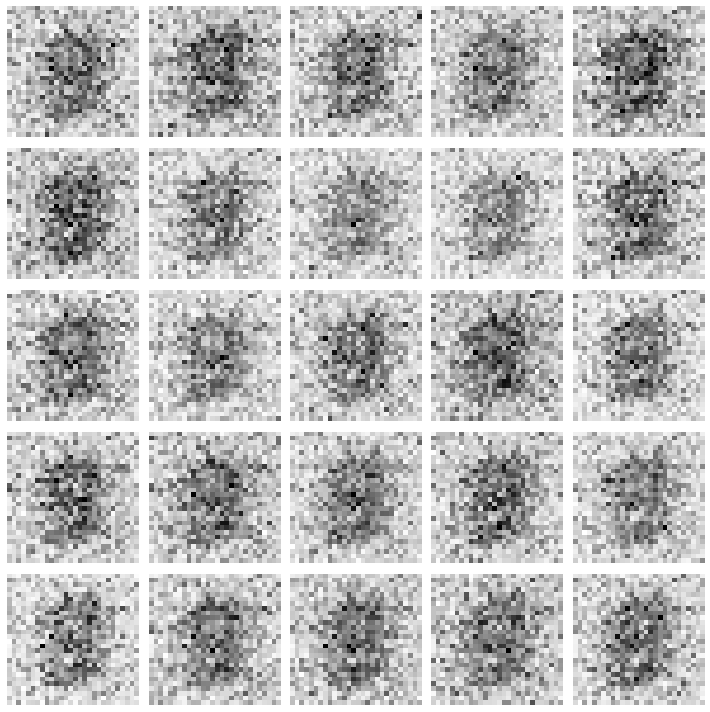

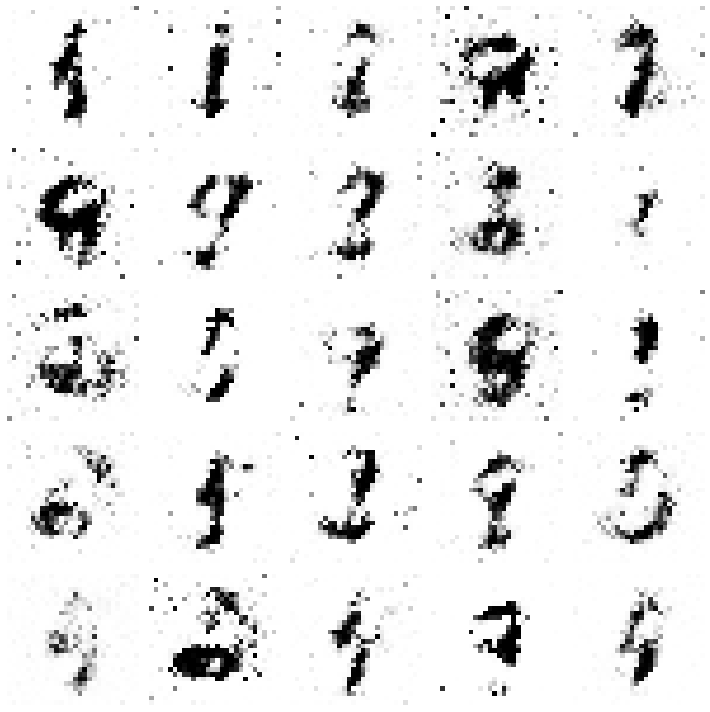

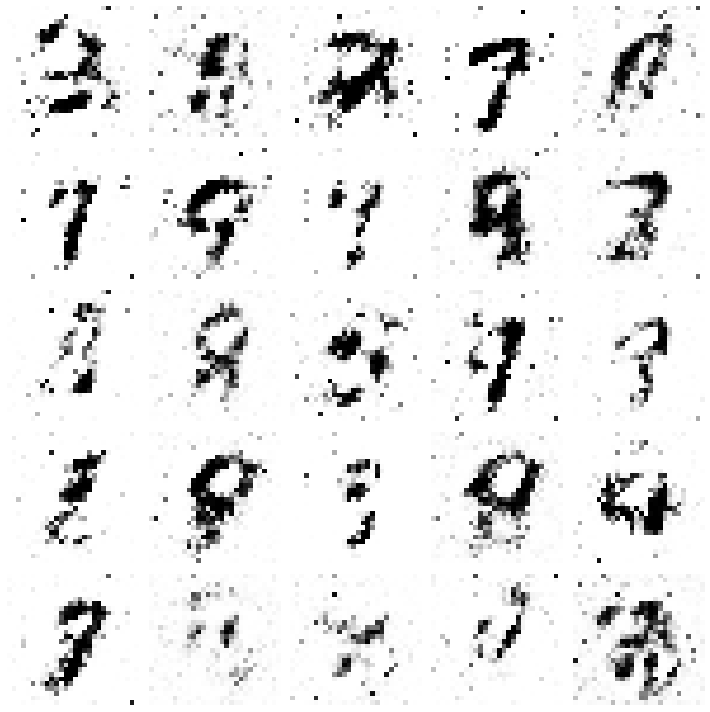

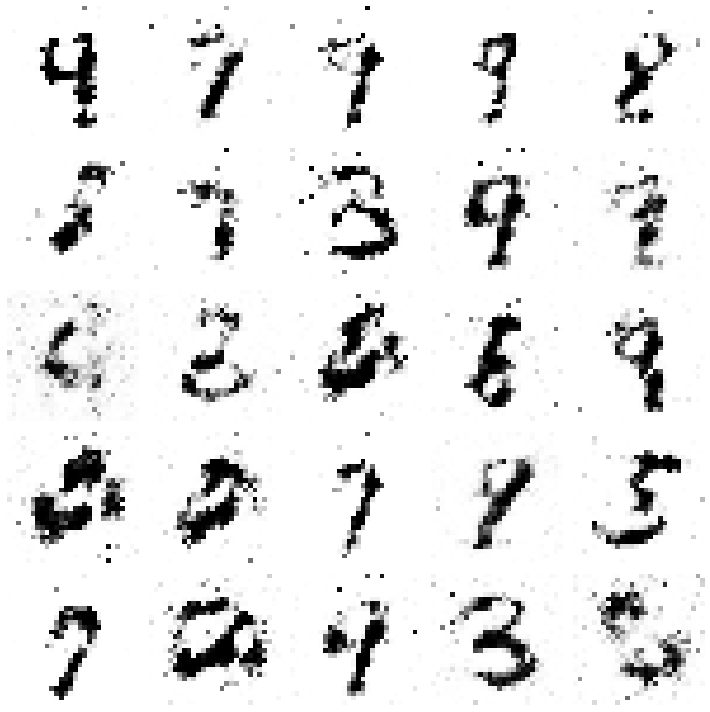

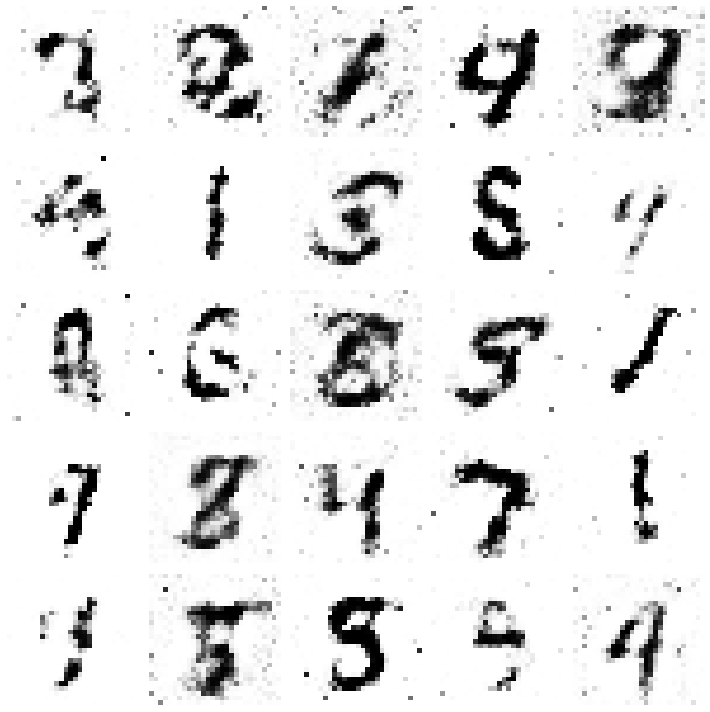

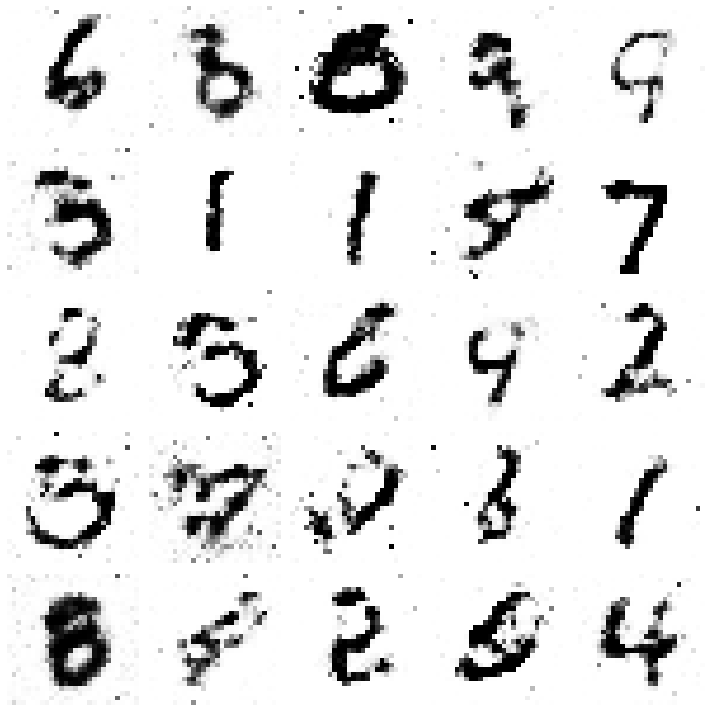

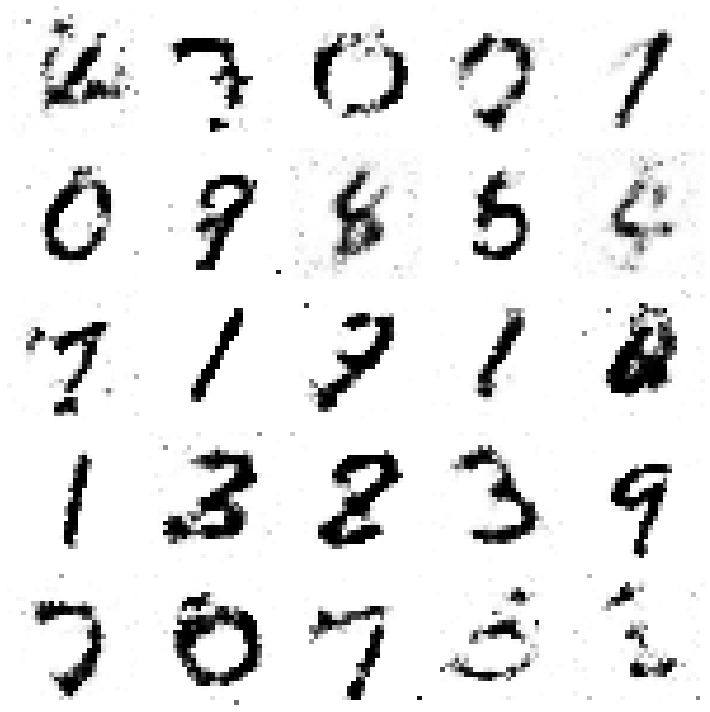

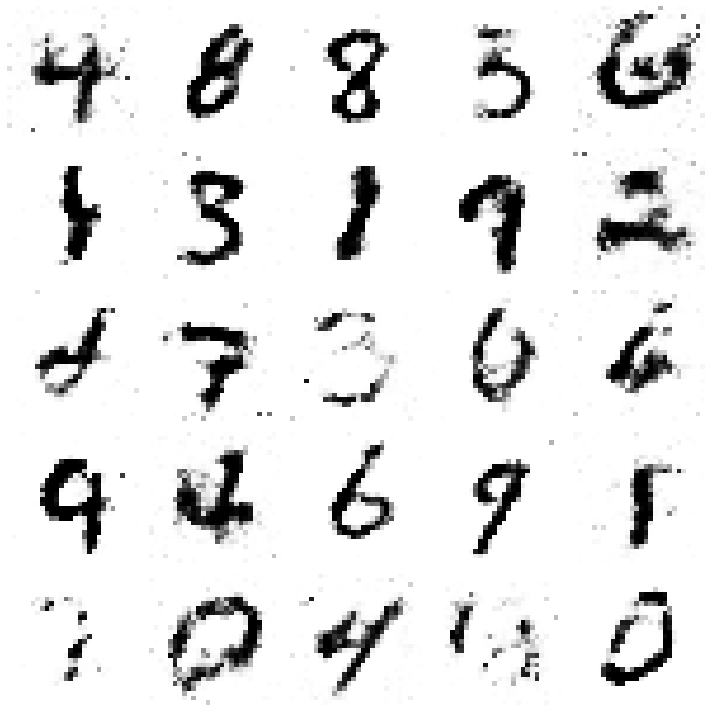

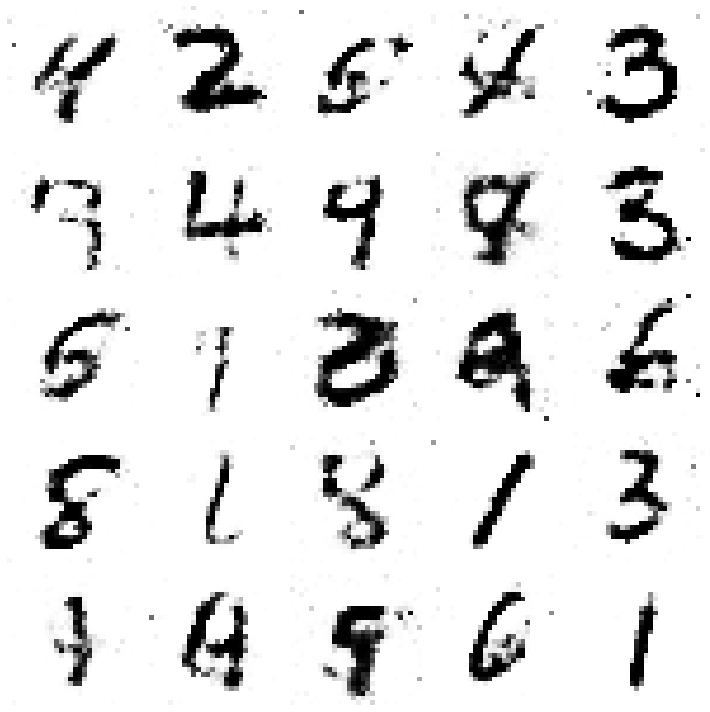

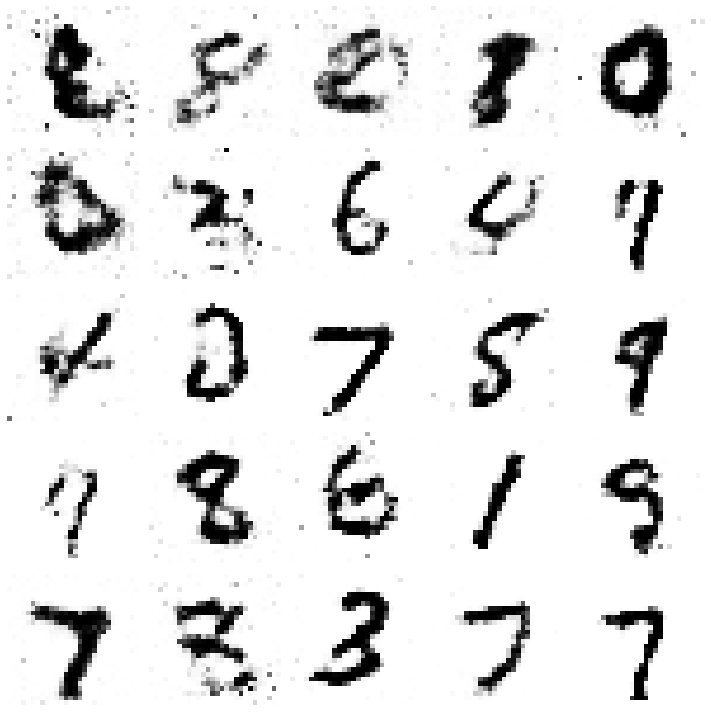

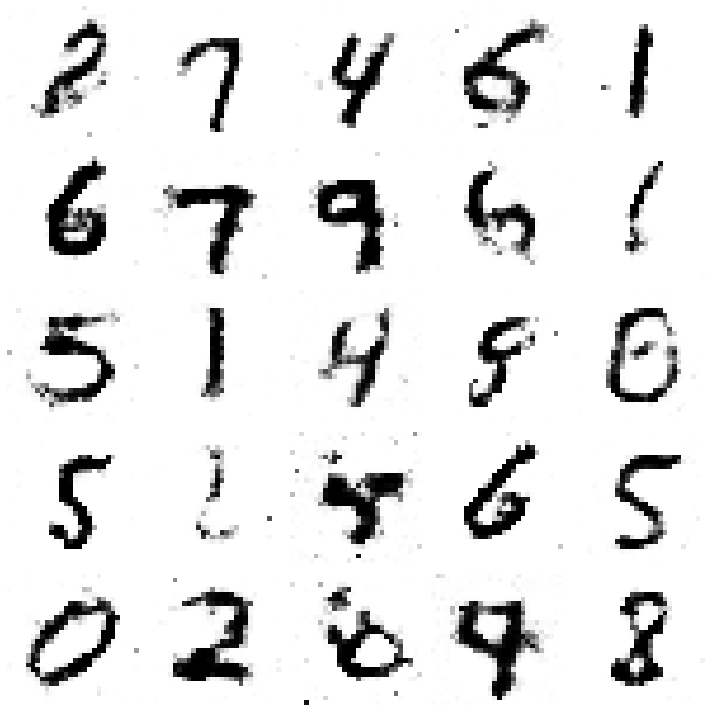

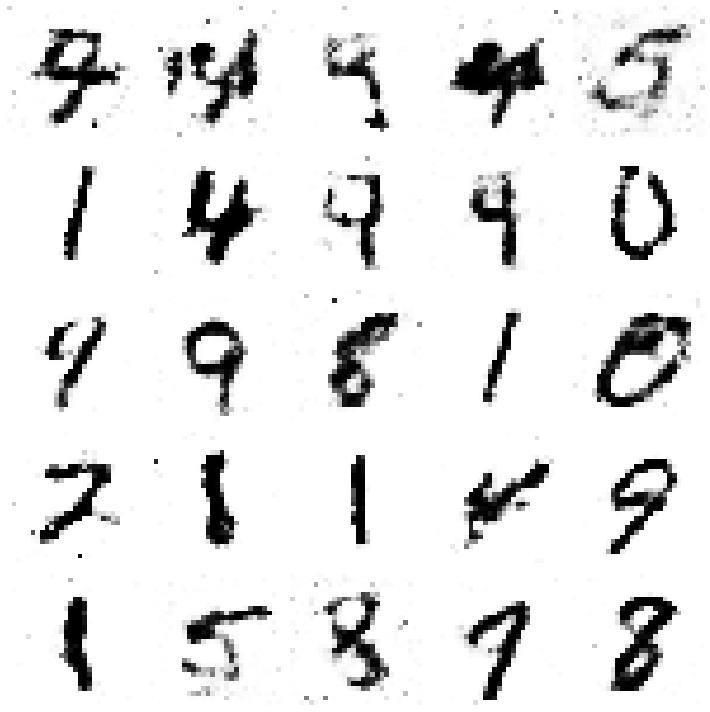

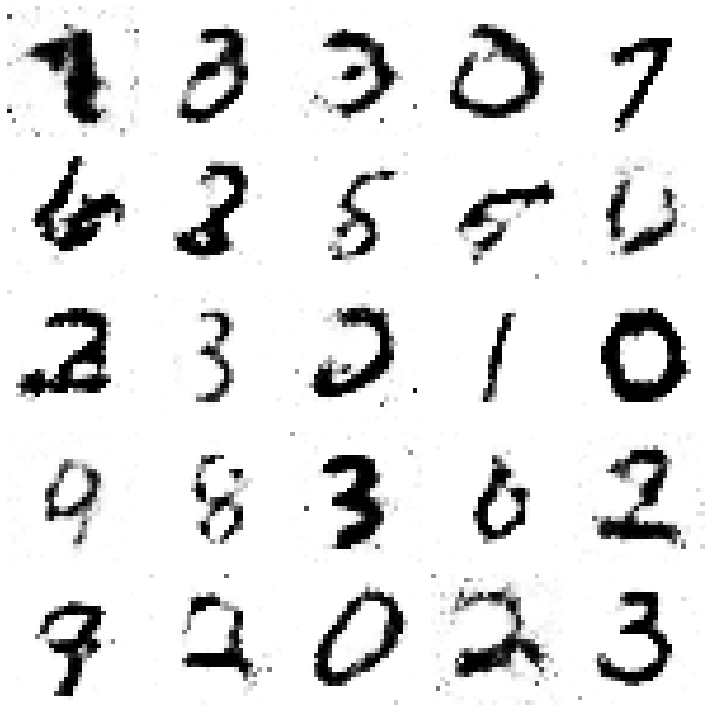

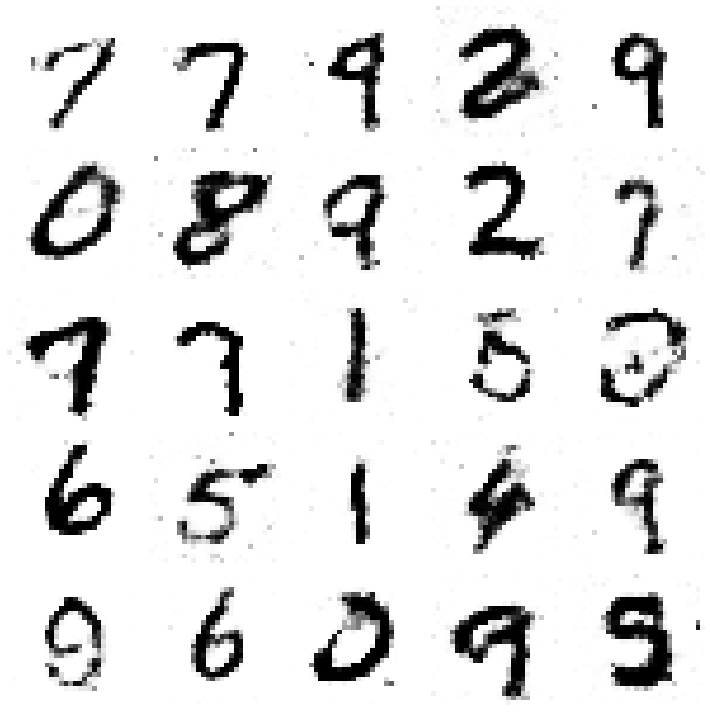

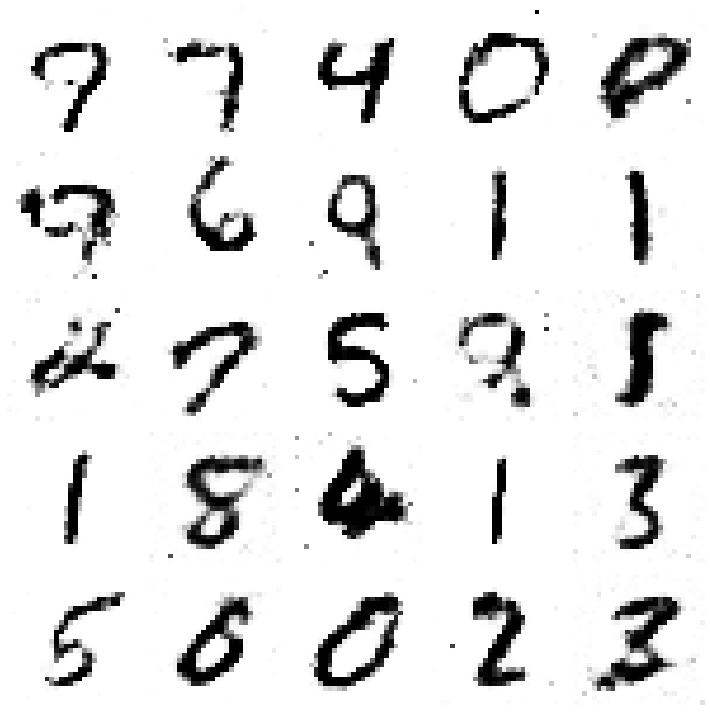

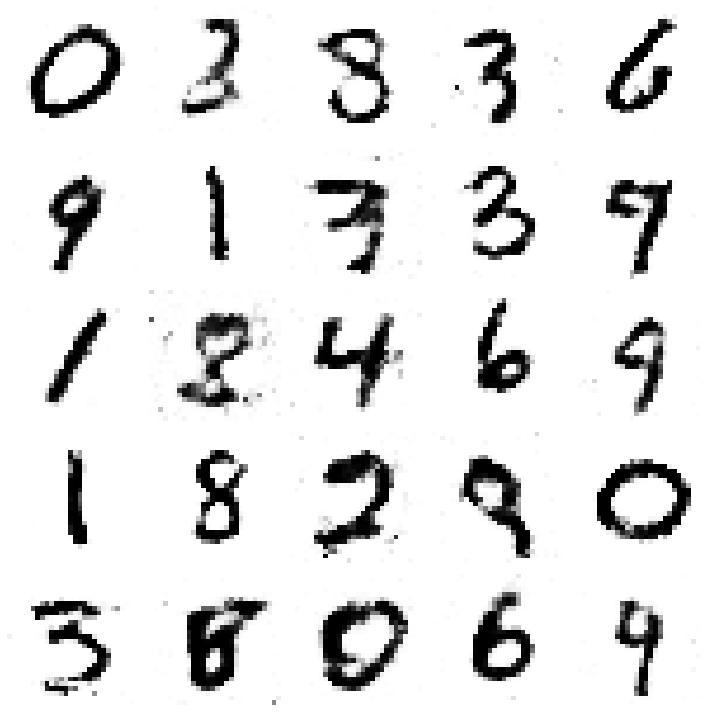

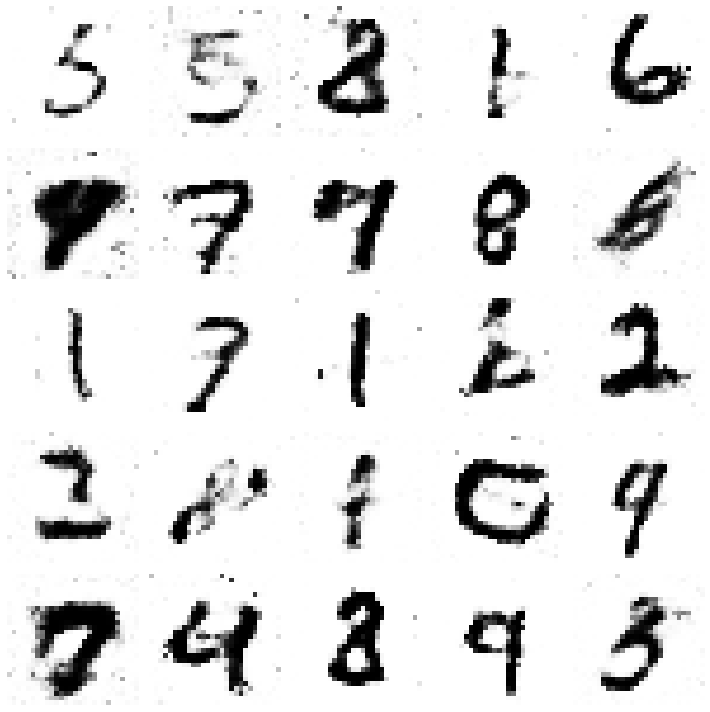

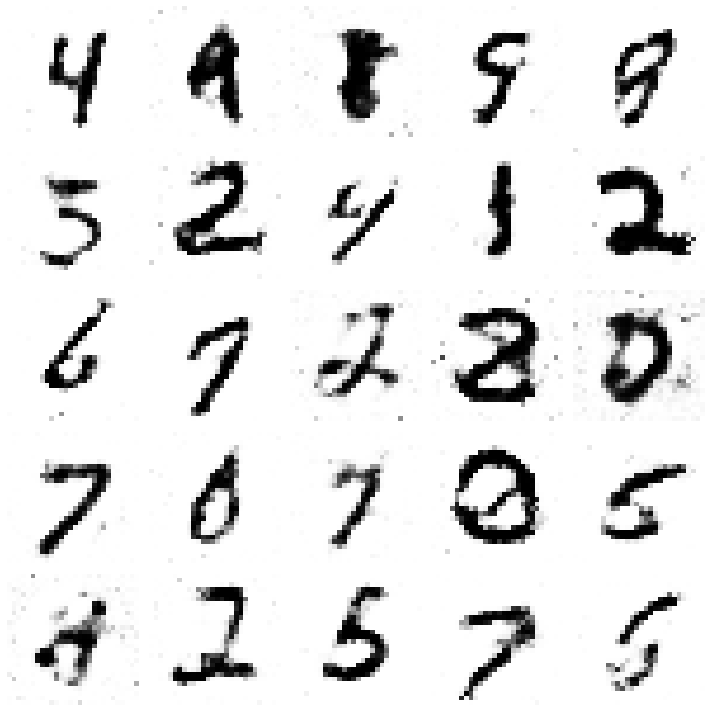

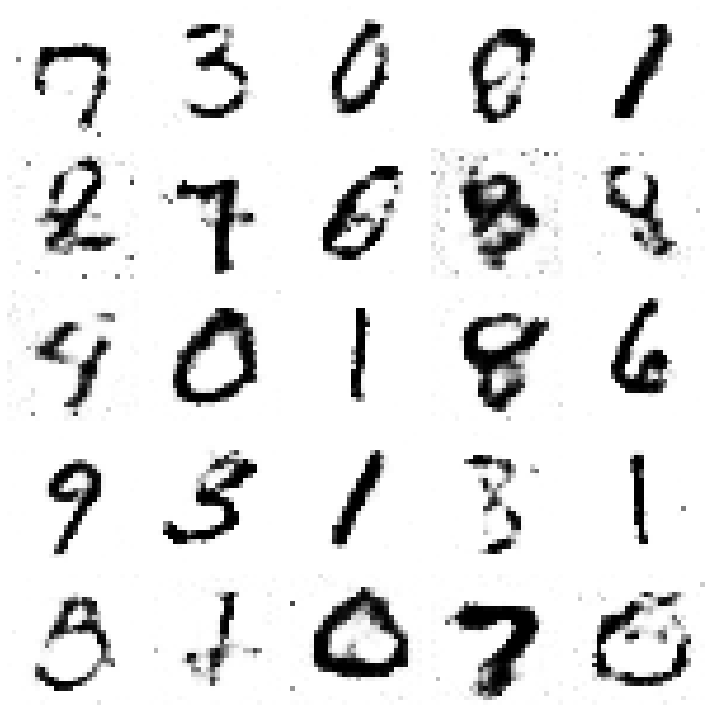

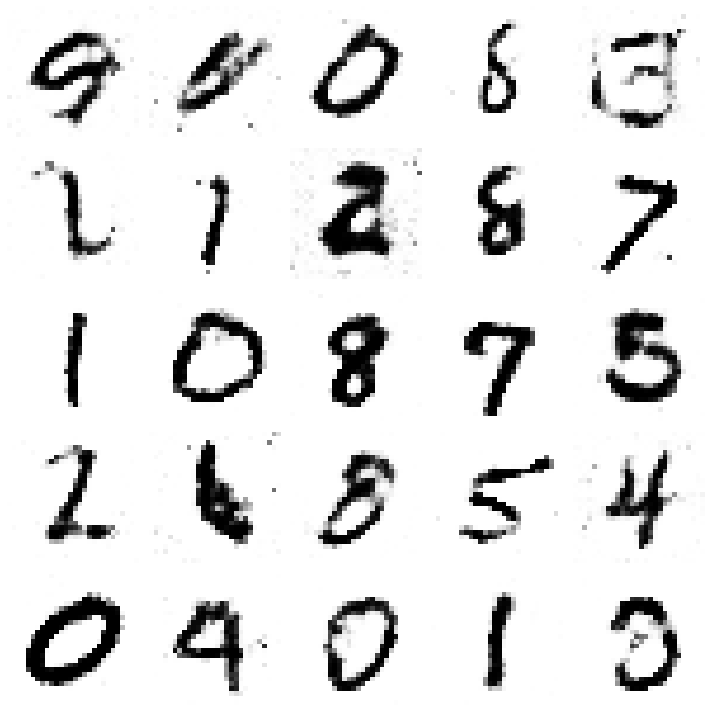

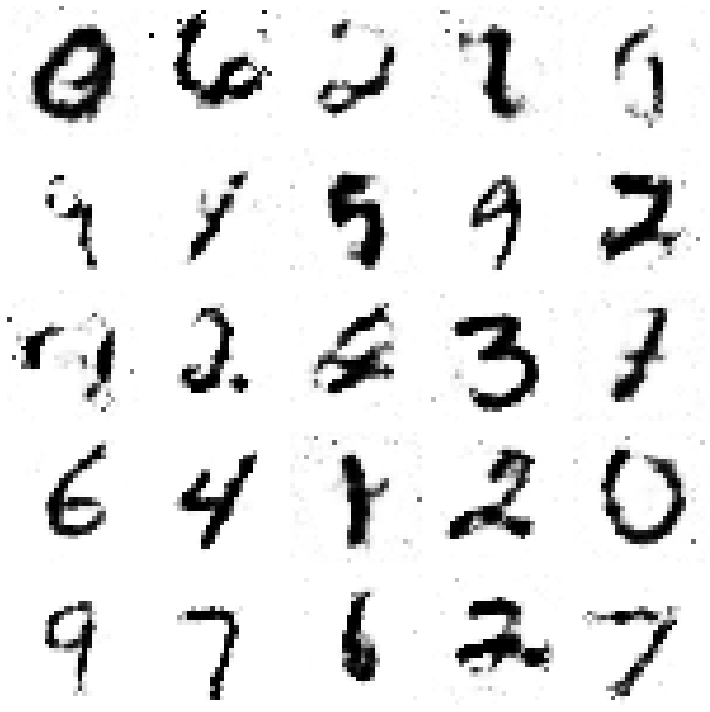

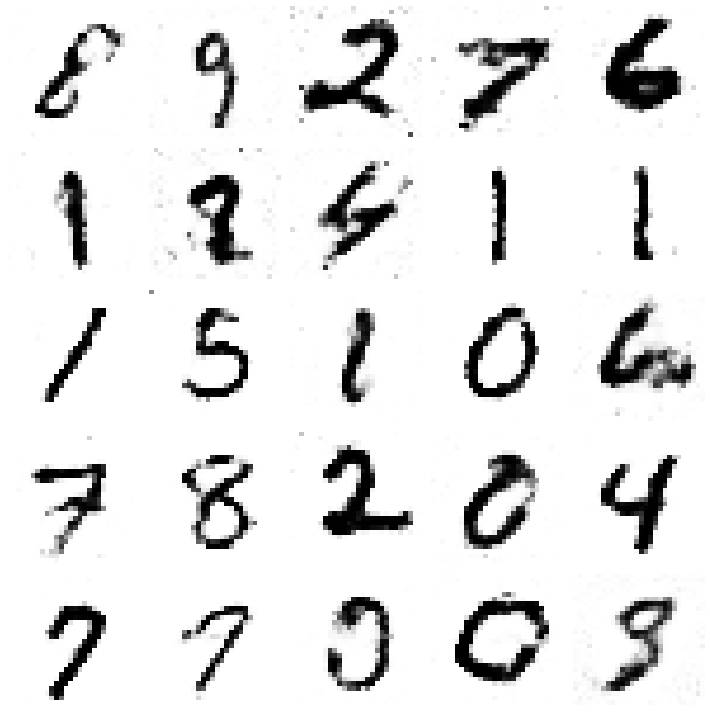

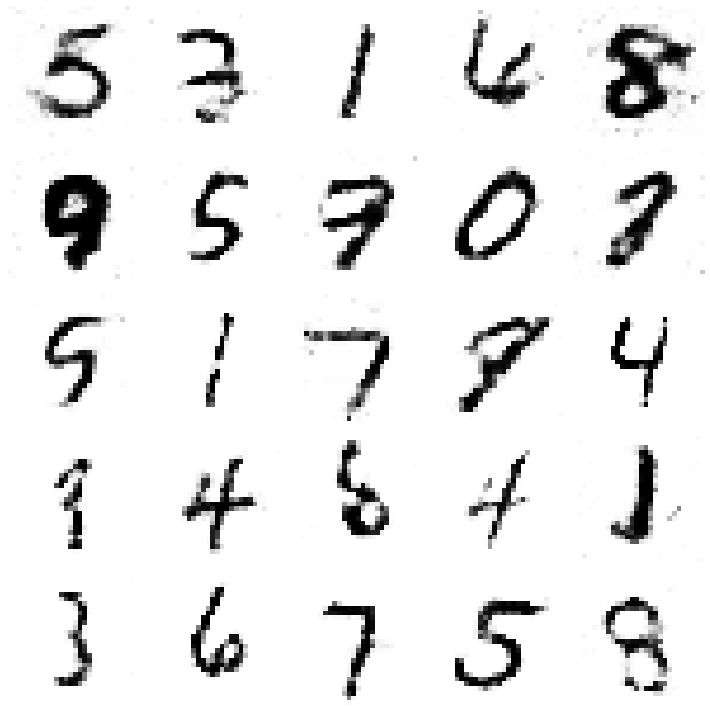

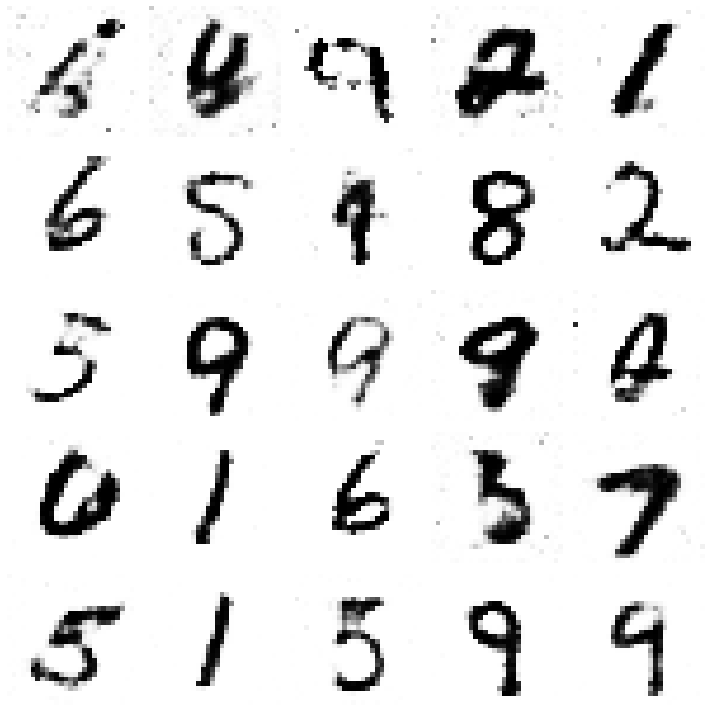

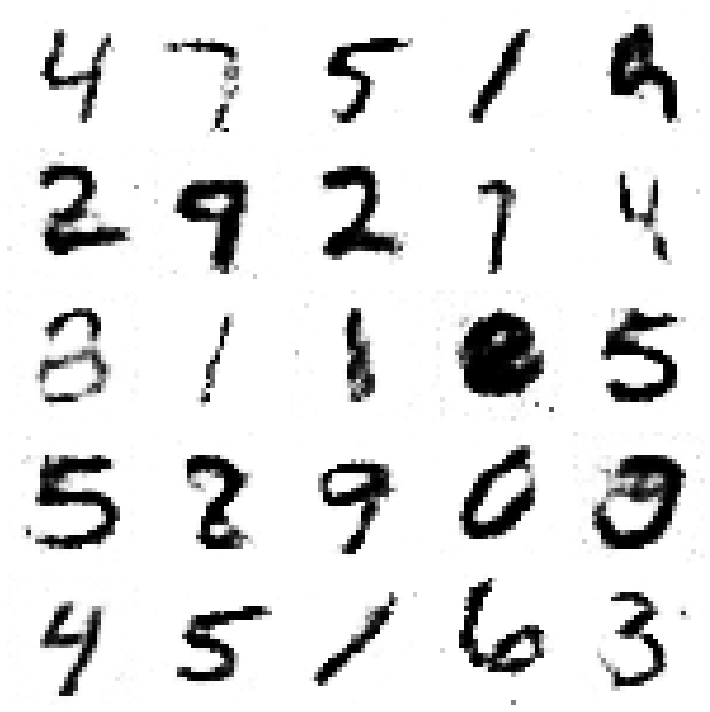

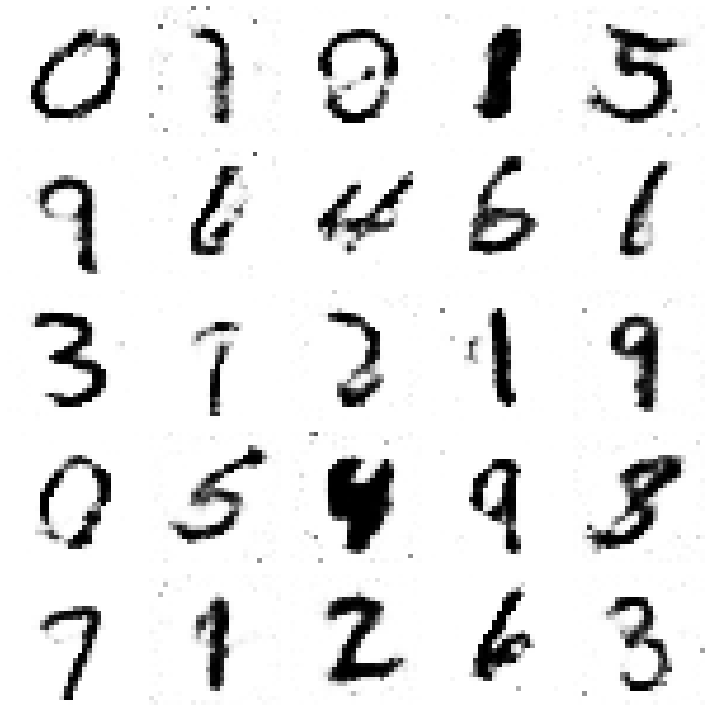

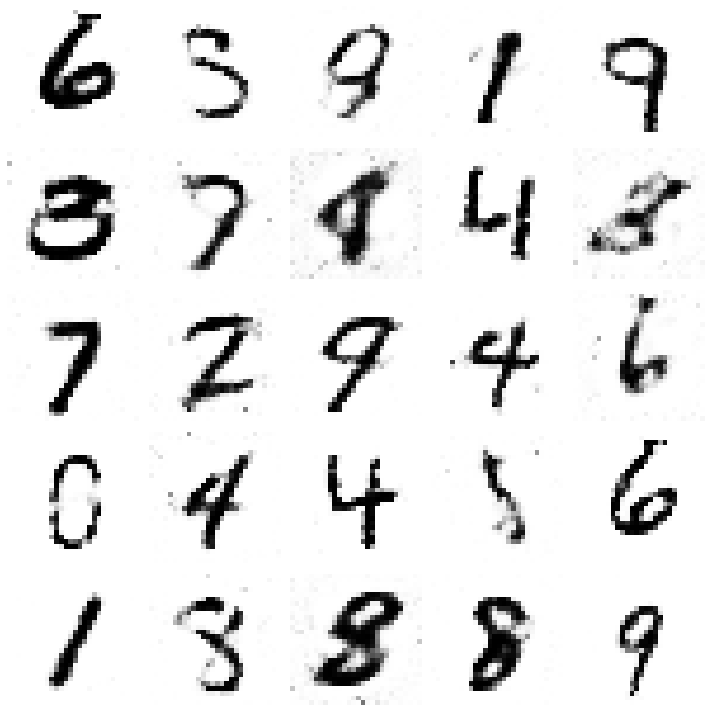

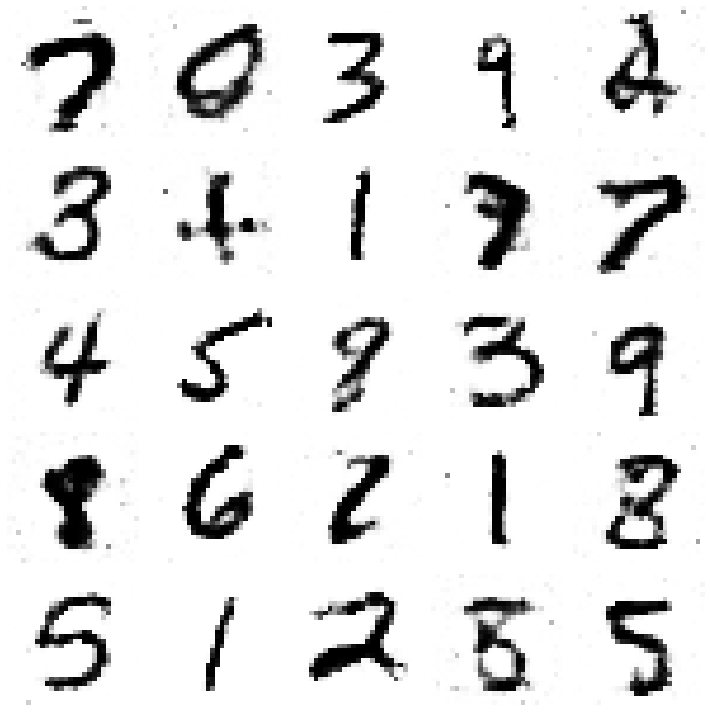

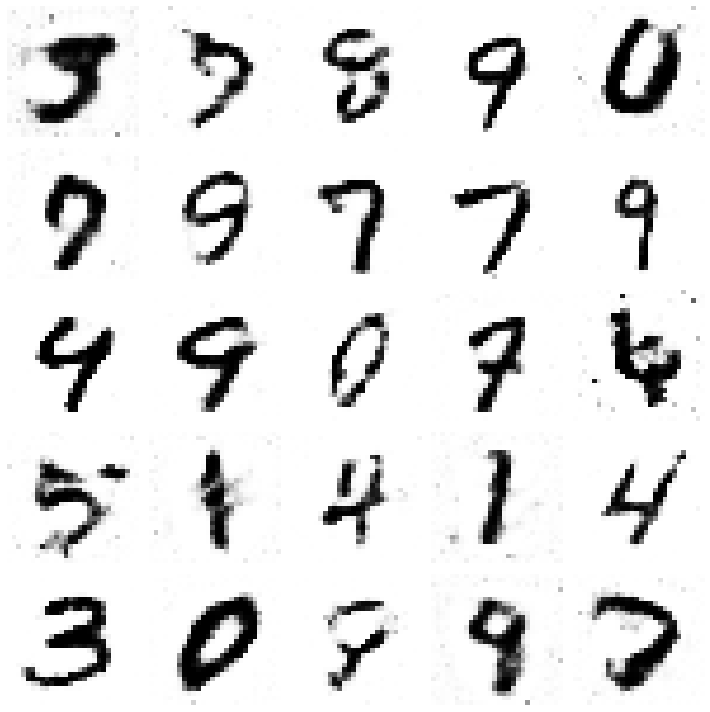

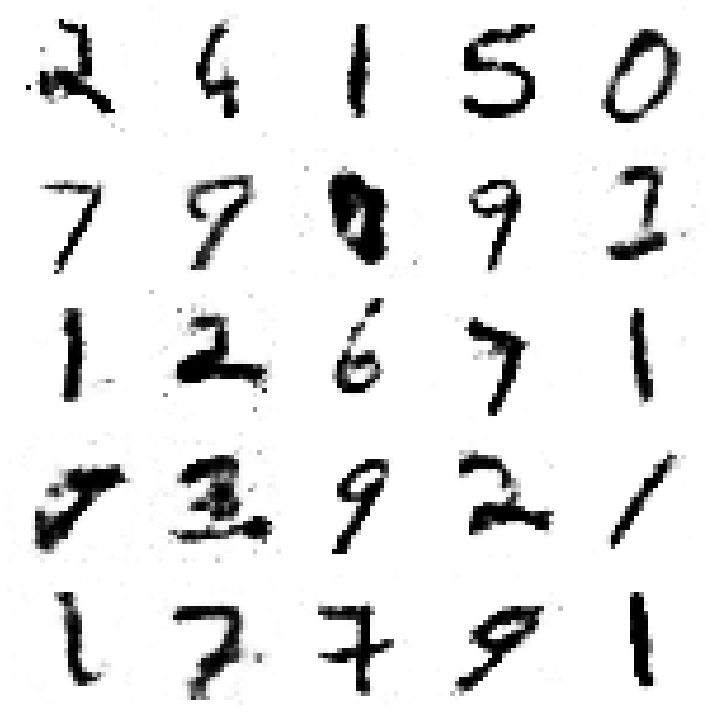

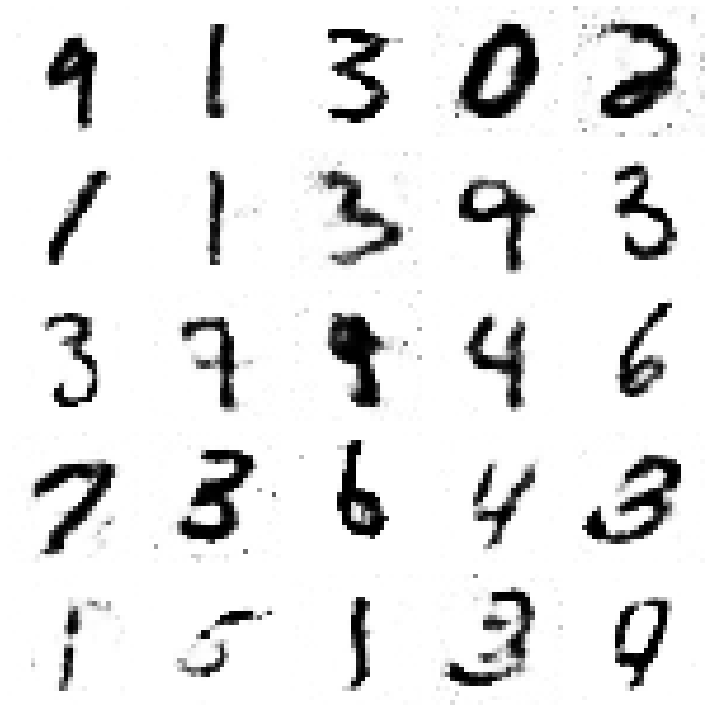

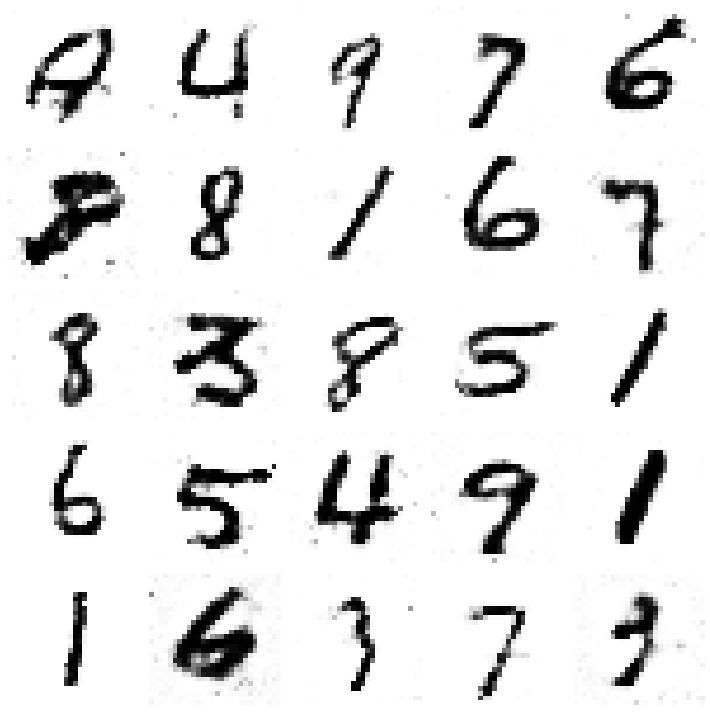

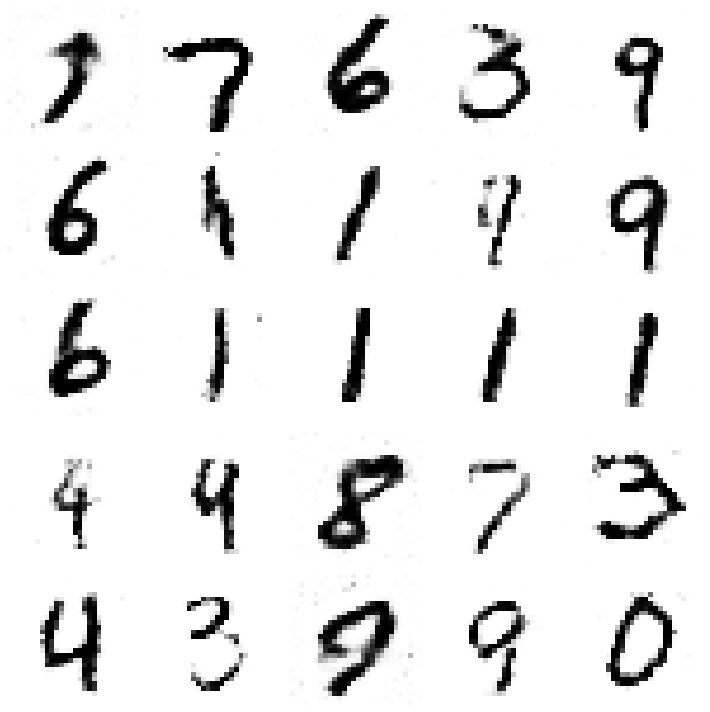

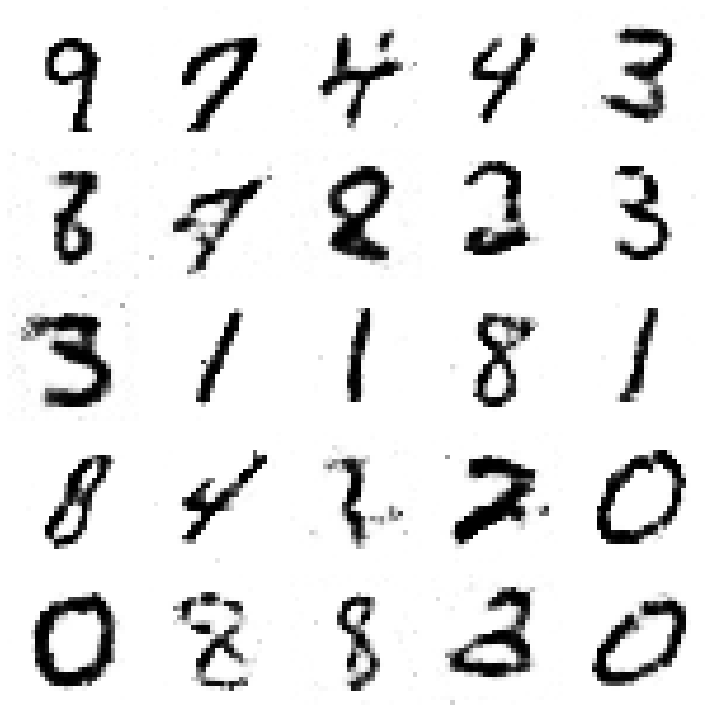

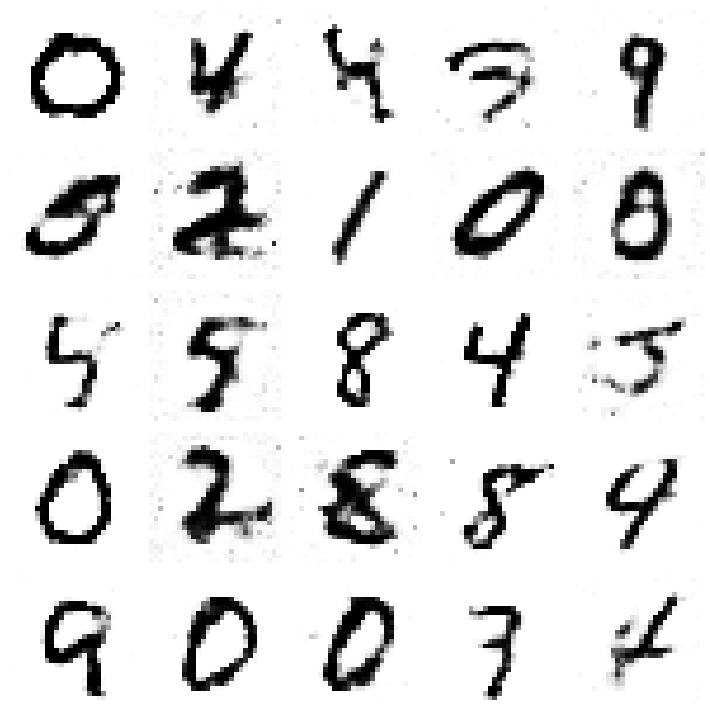

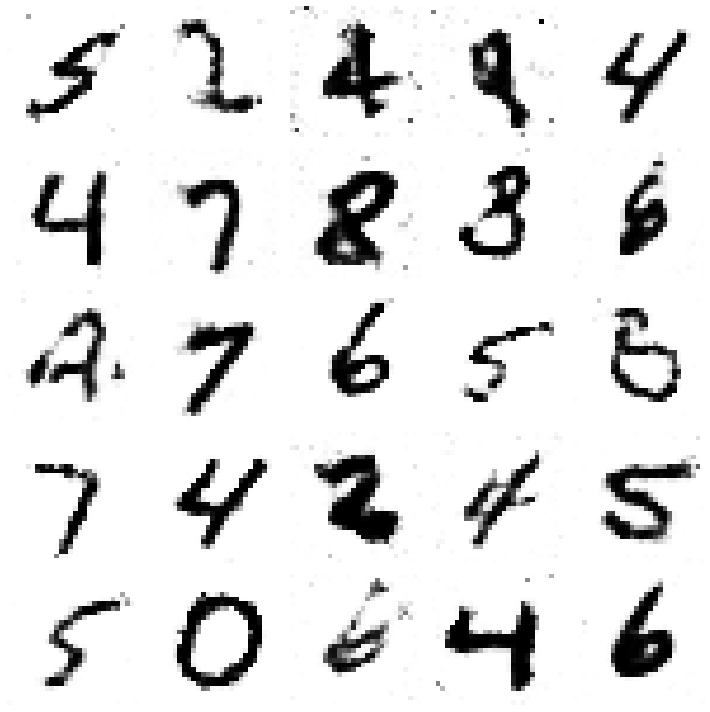

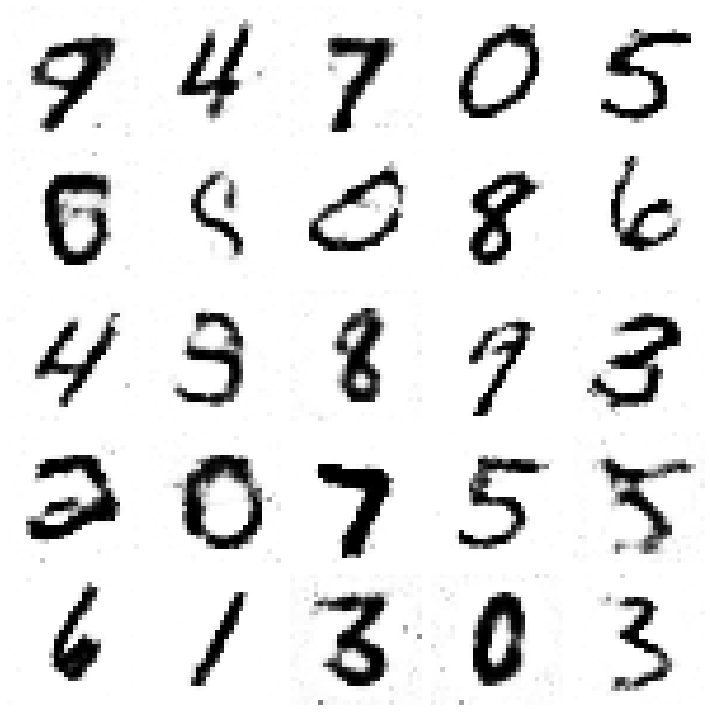

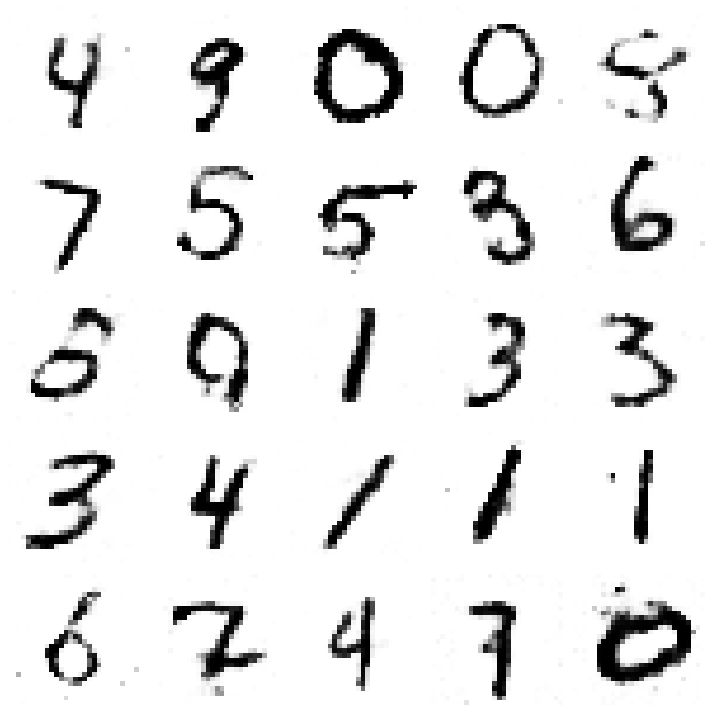

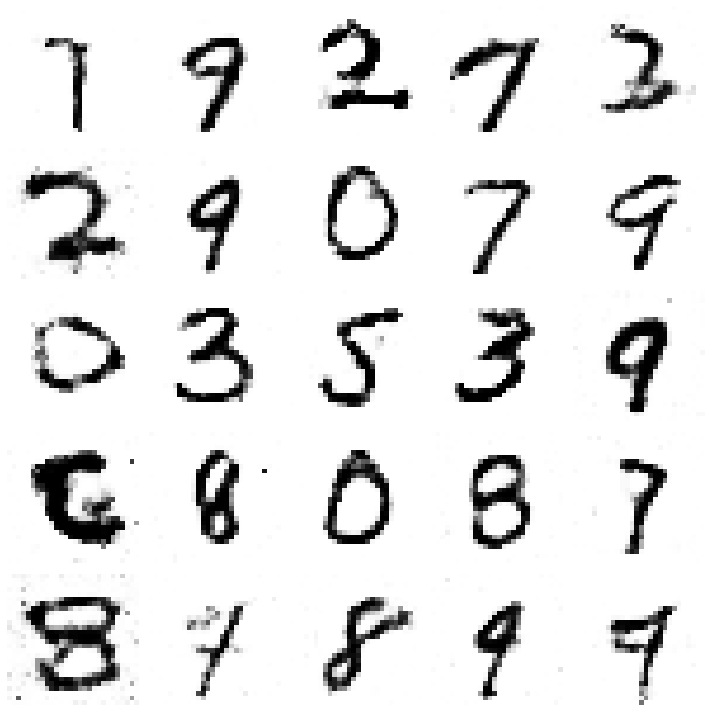

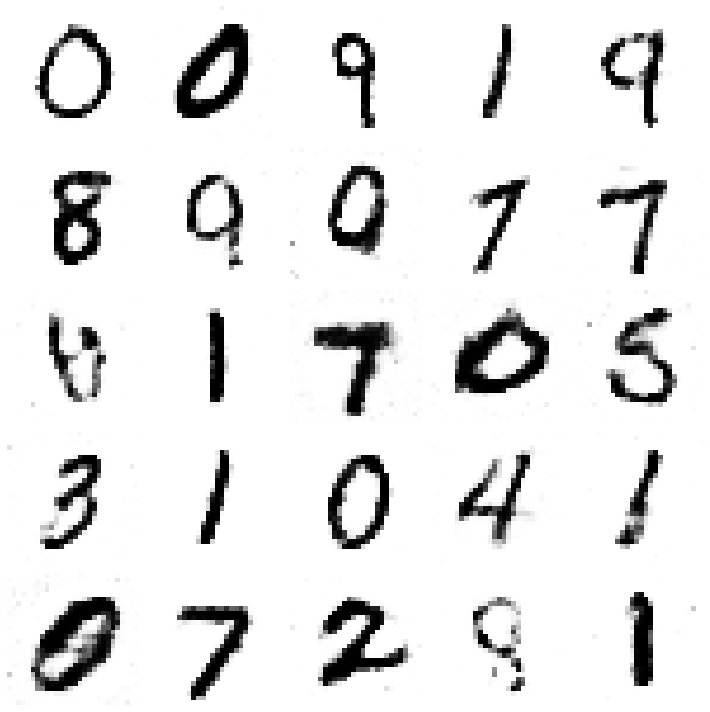

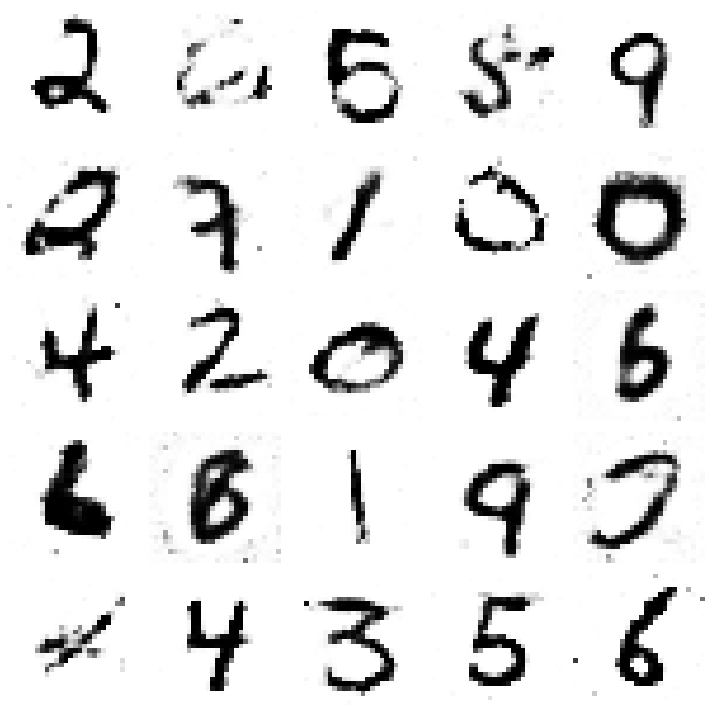

In [ ]:
def train_GAN(epochs=1, batch_size=128):
    # Loading the data
    X_train, y_train = load_data()

    # Creating GAN
    generator = build_generator()
    discriminator = build_discriminator()
    GAN = build_GAN(discriminator, generator)

    for i in range(1, epochs+1):
        print("Epoch %d" %i)

        for _ in tqdm(range(batch_size)):
            # Generate fake images from random noiset
            noise = np.random.normal(0, 1, (batch_size, 100))
            fake_images = generator.predict(noise)

            # Select a random batch of real images from MNIST
            real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]

            # Labels for fake and real images           
            label_fake = np.zeros(batch_size)
            label_real = np.ones(batch_size) 

            # Concatenate fake and real images
            X = np.concatenate([fake_images, real_images])
            y = np.concatenate([label_fake, label_real])

            # Train the discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y)

            # Train the generator/chained GAN model (with frozen weights in discriminator)
            discriminator.trainable = False
            GAN.train_on_batch(noise, label_real)

        # Draw generated images every 15 epoches
        if i == 1 or i % 10 == 0:
            draw_images(generator, i)
            
train_GAN(epochs=400, batch_size=128)


